In [1]:
pwd

'/home/anton/Documents/Uni/Deep_Learning/DL_UPC/results_all'

In [2]:
cd ..

/home/anton/Documents/Uni/Deep_Learning/DL_UPC


In [3]:
try:
  from torchinfo import summary
except:
  !pip install torchinfo
  from torchinfo import summary

In [4]:
cd codes/

/home/anton/Documents/Uni/Deep_Learning/DL_UPC/codes


In [8]:
from Netclasses_37 import RNN
model = RNN(3, 22, 29)
input_size=(8, 3, 256, 256)
summary(model,  col_names=["input_size","output_size", "num_params", "kernel_size", "mult_adds"], input_size= input_size)

RuntimeError: Failed to run torchinfo. See above stack traces for more details. Executed layers up to: [Sequential: 1, Conv2d: 2, ReLU: 2, Conv2d: 2, ReLU: 2, MaxPool2d: 2, Sequential: 1, BasicBlock: 2, Conv2d: 3, Conv2d: 3, ReLU: 3, BatchNorm2d: 3, BasicBlock: 2, Conv2d: 3, Conv2d: 3, ReLU: 3, BatchNorm2d: 3, BasicBlock: 2, Conv2d: 3, Conv2d: 3, ReLU: 3, BatchNorm2d: 3, Sequential: 1, Conv2d: 2, ReLU: 2, MaxPool2d: 2, Dropout2d: 1, Sequential: 1, BasicBlock: 2, Conv2d: 3, Conv2d: 3, ReLU: 3, BatchNorm2d: 3, BasicBlock: 2, Conv2d: 3, Conv2d: 3, ReLU: 3, BatchNorm2d: 3, BasicBlock: 2, Conv2d: 3, Conv2d: 3, ReLU: 3, BatchNorm2d: 3, Sequential: 1, Conv2d: 2, ReLU: 2, MaxPool2d: 2, Dropout2d: 1, Sequential: 1, BasicBlock: 2, Conv2d: 3, Conv2d: 3, ReLU: 3, BatchNorm2d: 3, BasicBlock: 2, Conv2d: 3, Conv2d: 3, ReLU: 3, BatchNorm2d: 3, BasicBlock: 2, Conv2d: 3, Conv2d: 3, ReLU: 3, BatchNorm2d: 3, AdaptiveAvgPool2d: 1, Flatten: 2]

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_res(filename):
    res = pd.read_csv("./../results_all/"+filename)
    
    print(res["val_acc"][-50:].mean())
    print(res["train_acc"][-50:].mean())
    print(res["val_acc"][:].max())
    print(res["train_acc"][:].max())


    # Create a figure with two subplots side by side

    # Plot data on the first subplot
    ax = res[["train_acc", "val_acc"]].plot()
    ax.set_title('Accuracy')
    ax.set_ylabel('Accuracy Value')
    ax.set_xlabel('Epoch')

    # Plot data on the second subplot
    #res[["train_acc", "val_acc"]].plot(ax=axes[1])
    #axes[1].set_title('Accuracy')
    #axes[1].set_ylabel('Accuracy Value')
    #axes[1].set_xlabel('Epoch')

    # Adjust the layout and show the plot
    plt.tight_layout()
    plt.show()
    
    # Calculate the statistics you want to display, formatted to two decimal places
    val_acc_mean_last_50 = f"{np.mean(res['val_acc'][-50:]):.2f}"
    train_acc_mean_last_50 = f"{np.mean(res['train_acc'][-50:]):.2f}"
    val_acc_max = f"{np.max(res['val_acc']):.2f}"
    train_acc_max = f"{np.max(res['train_acc']):.2f}"

    # Create a table data
    data = {
        "Metric": ["Validation Accuracy", "Training Accuracy"],
        "Mean of Last 50": [val_acc_mean_last_50, train_acc_mean_last_50],
        "Maximum": [val_acc_max, train_acc_max]
    }

    # Create a figure and a set of subplots
    fig, ax = plt.subplots(figsize=(8, 1))  # You can adjust the size by changing the width and height in the tuple
    # Hide axes
    ax.xaxis.set_visible(False) 
    ax.yaxis.set_visible(False)
    ax.set_frame_on(False)

    # Create a table and put it on the axes
    table_data = list(zip(data["Metric"], data["Mean of Last 50"], data["Maximum"]))
    table = ax.table(cellText=table_data, colLabels=["Metric", "Mean of Last 50", "Maximum"], loc='center', cellLoc='center')

    # Adjust table scale
    table.auto_set_font_size(True)
    table.set_fontsize(12)
    table.scale(1.2, 1.2)
    
    plt.tight_layout()
    plt.show()


73.15861742424244
76.11092985318108
76.39678030303031
77.67638662316476


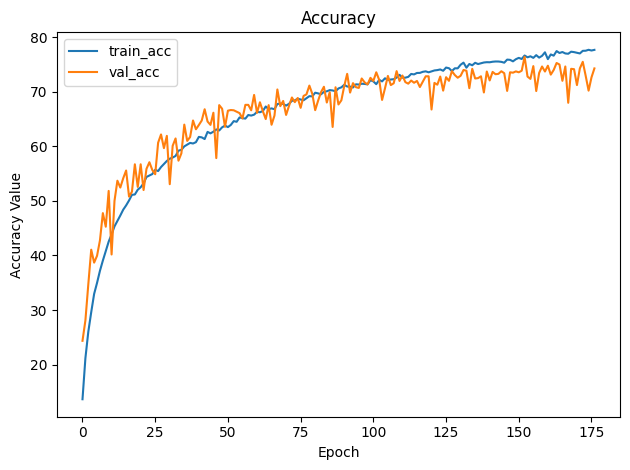

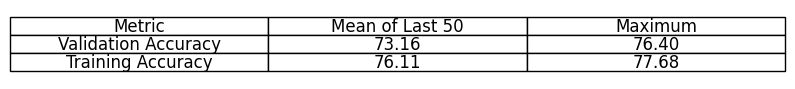

In [7]:
plot_res("results37_new.csv")

TypeError: object of type 'float' has no len()

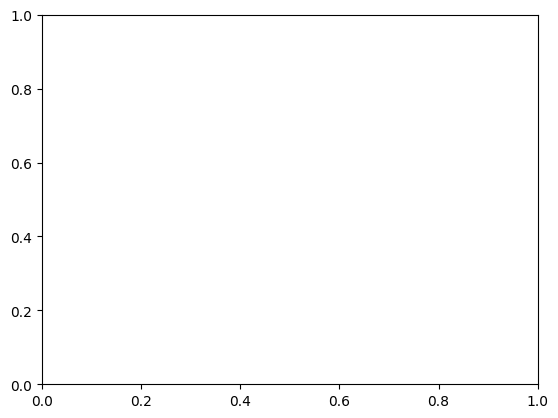

In [8]:
plt.table([52.35902370478984,
54.30343235278641,
67.87405303030303,
66.70575040783034])

78.0842803030303
85.66007340946166
80.25568181818181
86.73531810766721


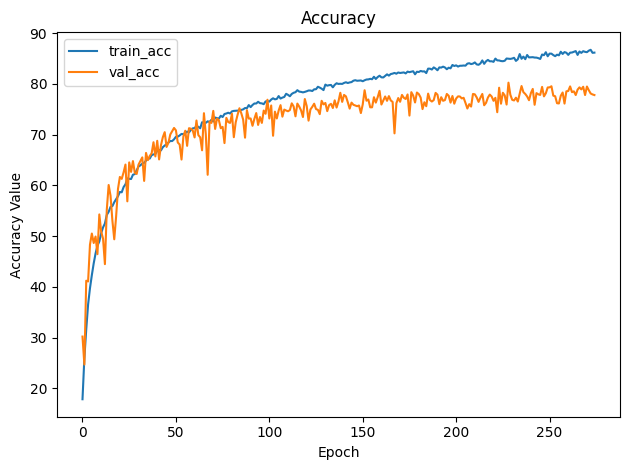

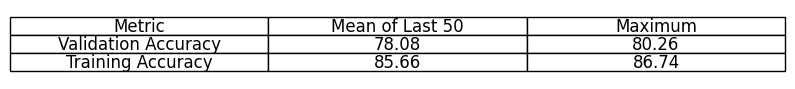

In [12]:
plot_res("results36.csv")

76.36458333333334
76.28028140293637
77.81723484848486
77.36031810766721


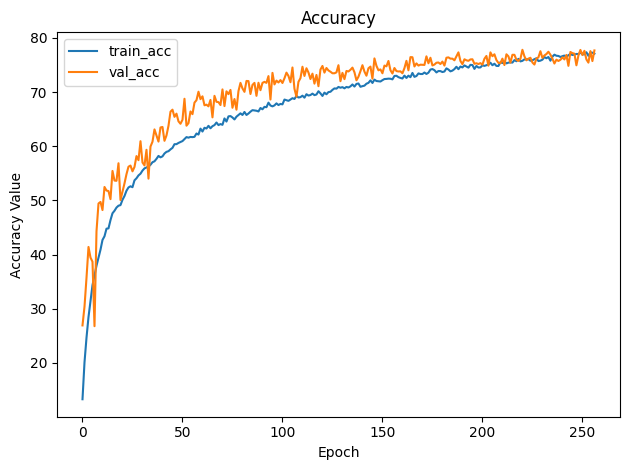

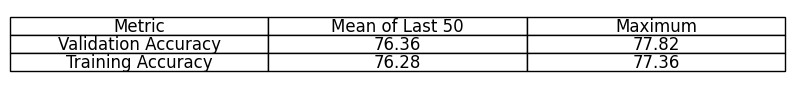

In [10]:
plot_res("results37.csv")

In [20]:
from Netclasses_15 import RNN
model = RNN(3, 10, 29)
input_size=(8, 3, 256, 256)
summary(model,  col_names=["input_size","output_size", "num_params", "kernel_size", "mult_adds"], input_size= input_size)

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Kernel Shape              Mult-Adds
RNN                                      [8, 3, 256, 256]          [8, 29]                   --                        --                        --
├─Sequential: 1-1                        [8, 3, 256, 256]          [8, 20, 125, 125]         --                        --                        --
│    └─Conv2d: 2-1                       [8, 3, 256, 256]          [8, 10, 252, 252]         1,480                     [7, 7]                    751,887,360
│    └─ReLU: 2-2                         [8, 10, 252, 252]         [8, 10, 252, 252]         --                        --                        --
│    └─Conv2d: 2-3                       [8, 10, 252, 252]         [8, 20, 250, 250]         5,020                     [5, 5]                    2,510,000,000
│    └─ReLU: 2-4                         [8, 20, 250, 250]         [8, 20, 250, 250] 

46.96714285714285
98.80938775510205
50.07142857142857
99.83673469387756


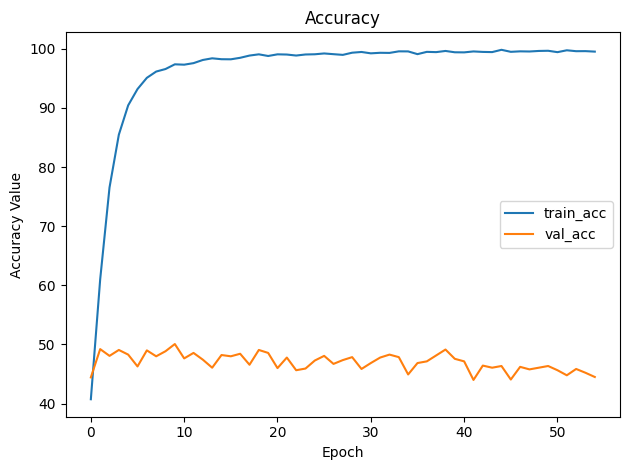

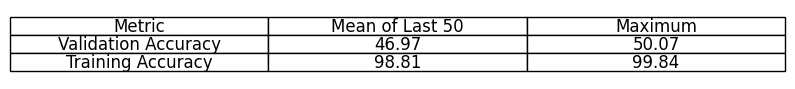

In [17]:
plot_res("results_again.csv")